# Cancer Dataset with PCA & SVM

In this exercise, we are again analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset. First, we will be reducing the number of dimensions with PCA, then we will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up DataFrame

In [8]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Exploratory Data Analysis



We'll skip the Data Viz part for this lecture since we already have looked at the data.

In [10]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

y= cancer["target"]

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.45705868e-01, 2.01746824e-01, 8.32098393e-02, 6.59708001e-02,
       5.59096858e-02, 4.06732746e-02, 2.07857518e-02, 1.49101320e-02,
       1.40889878e-02, 1.12694886e-02, 9.25054470e-03, 8.67477577e-03,
       7.58643683e-03, 5.47548349e-03, 2.91434494e-03, 2.45292619e-03,
       1.75921324e-03, 1.34735372e-03, 1.32498028e-03, 1.00351430e-03,
       9.50841288e-04, 8.10161284e-04, 6.61895012e-04, 5.34323647e-04,
       4.47814670e-04, 2.70289443e-04, 2.06503031e-04, 3.57444805e-05,
       1.84403808e-05, 3.76082051e-06])

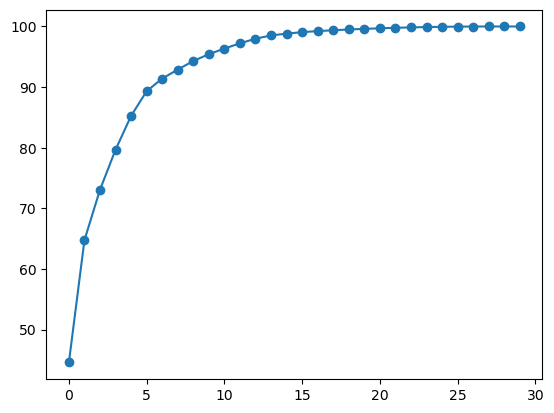

In [15]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [16]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [17]:
explained_variance

array([0.44570587, 0.20174682])

In [18]:
sum(explained_variance)

0.6474526924367048

If we 2 pca components, we would be capturing 64% of the variance. There is no set number of pca components we should use. The heuristic is that "we should select enough components to explain enough of the variance that we are comfortable with." Thus, I would suggest you to start with 2, then build your model and see if you are satisfied with your model performance. If not, then you can change the number of pca components to capture more of the variance and see whether it will affect your model performance. 

# Train the Support Vector Classifier

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(random_state=123)

In [21]:
model.fit(X_train2,y_train)

SVC(random_state=123)

## Predictions and Evaluations

Now let's predict using the trained model.

In [22]:
predictions = model.predict(X_test2)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  5 100]]


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        66
           1       0.91      0.95      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



The model performs well. Let's see if we change the number of pca components to 5, will our model performance change or not? Based on the PCA explained variance graph above, 5 pca components explain close to 85% variance

In [26]:
pca = PCA(n_components = 5)
X_train5 = pca.fit_transform(X_train)
X_test5 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [27]:
explained_variance

array([0.44570587, 0.20174682, 0.08320984, 0.0659708 , 0.05590969])

In [28]:
sum(explained_variance)

0.8525430176827498

In [29]:
model = SVC(random_state=123)

In [30]:
model.fit(X_train5,y_train)

SVC(random_state=123)

In [31]:
predictions = model.predict(X_test5)

In [32]:
print(confusion_matrix(y_test,predictions))

[[ 60   6]
 [  2 103]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Model performance increased slightly. At this point, we need to decide whether the increase is worth the memory and speed loss we experience when we use more features. This becomes very important when we have thousands of features to train with.

# Gridsearch

In [34]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ["auto","scale"],'kernel': ['linear','rbf']} 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(SVC(random_state=123),param_grid,verbose=3)

In [37]:
grid.fit(X_train5,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.835 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear

GridSearchCV(estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [38]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

In [39]:
grid.best_estimator_

SVC(C=10, gamma='auto', kernel='linear', random_state=123)

In [40]:
grid_predictions = grid.predict(X_test5)

In [41]:
print(confusion_matrix(y_test,grid_predictions))

[[ 64   2]
 [  4 101]]


In [42]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.98      0.96      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



With Grid Search, we were able to increase our model performance little bit more.